# Imports

In [2]:
import os

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

```latex
% gives the width of the current document in pts
\showthe\textwidth
```

```shell
> 345.0pt.
l.5 \showthe\textwidth
```

# Plotstyle

In [3]:
# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
tex_fonts = {
    # Use LaTeX to write all text
    "text.latex.preamble": r"\usepackage[T1]{fontenc}\usepackage{amsfonts}\usepackage{amsmath}\usepackage{amssymb}",  #  for the align enivironment
    "text.usetex": True,  # use inline math for ticks
    "font.family": "serif",
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "savefig.transparent": True,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
}

plt.rcParams.update(tex_fonts)

In [4]:
textwidth = 430
columnwidth = 252

In [5]:
# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [6]:
height = set_size(textwidth, fraction=1 / 2)[0]
height

2.9749550297495504

# Load data

In [7]:
df_list = []
for f in os.listdir("./output"):
    df = pd.read_csv("output/" + f)
    df["dataset"] = os.path.splitext(f)[0]
    df_list.append(df)
df = pd.concat(df_list)
# x and y dropout are equal combine them and call it dropout
df.drop(columns=["params.y_dropout"], inplace=True)
df.rename(columns={"params.x_dropout": "params.dropout"}, inplace=True)


def get_column_rename_map(df, prefix):
    columns_orig = list(filter(lambda x: x.startswith(prefix), df.columns))
    columns_renamed = list(map(lambda x: x.replace(prefix, ""), columns_orig))
    columns_rename_dict = dict(zip(columns_orig, columns_renamed))
    return columns_rename_dict


all_params_rename_map = get_column_rename_map(df, "params.")
metrics_rename_map = get_column_rename_map(df, "metrics.")

df = df.rename(columns=all_params_rename_map)
df = df.rename(columns=metrics_rename_map)
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,train_logLik,stopped_epoch,val_logLik,restored_epoch,...,learning_rate,y_base_units,model_type,use_multiprocessing,tags.mlflow.log-model.history,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user,dataset
0,36da5dada3ae481394f0019d08342e74,780016099132921335,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:49:36.150000+00:00,2023-05-15 13:51:11.361000+00:00,4.170356,234.0,9.272797,134.0,...,0.001,100,ModelType.INTER,False,"[{""run_id"": ""36da5dada3ae481394f0019d08342e74""...",shivering-moose-549,hp.py,LOCAL,daniel,airfoil
1,6e573d95877c4ff8868c51ea16037dfa,780016099132921335,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:45:52.727000+00:00,2023-05-15 13:48:07.655000+00:00,5.033811,251.0,8.921698,151.0,...,0.001,100,ModelType.INTER,False,"[{""run_id"": ""6e573d95877c4ff8868c51ea16037dfa""...",brawny-fly-605,hp.py,LOCAL,daniel,airfoil
2,1d6060adda0644f28efd6488802e32bd,780016099132921335,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:43:35.864000+00:00,2023-05-15 13:45:55.516000+00:00,4.376872,319.0,9.520170,219.0,...,0.001,100,ModelType.INTER,False,"[{""run_id"": ""1d6060adda0644f28efd6488802e32bd""...",handsome-vole-853,hp.py,LOCAL,daniel,airfoil
3,5f22dbed85ae40e99ca9f9da5bf7de48,780016099132921335,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:40:20.170000+00:00,2023-05-15 13:49:36.088000+00:00,0.463991,1352.0,0.594987,1252.0,...,0.001,100,ModelType.LS,False,"[{""run_id"": ""5f22dbed85ae40e99ca9f9da5bf7de48""...",persistent-stoat-468,hp.py,LOCAL,daniel,airfoil
4,8d101a6697a843e48cd4928e95fe9ba0,780016099132921335,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:39:33.217000+00:00,2023-05-15 13:41:39.238000+00:00,4.585800,319.0,8.992318,219.0,...,0.001,50,ModelType.INTER,False,"[{""run_id"": ""8d101a6697a843e48cd4928e95fe9ba0""...",zealous-dog-252,hp.py,LOCAL,daniel,airfoil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,abda5c27c3c14d529e2258193fdb29b0,315936683450817126,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:49:54.648000+00:00,2023-05-16 04:52:27.316000+00:00,-59.588959,717.0,-80.636681,617.0,...,0.010,50,ModelType.LS,False,"[{""run_id"": ""abda5c27c3c14d529e2258193fdb29b0""...",merciful-fox-213,hp.py,LOCAL,daniel,yacht
2588,3ba476af5eb54e85a907cf356e643687,315936683450817126,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:49:54.643000+00:00,2023-05-16 04:52:26.411000+00:00,-67.528519,797.0,-93.695160,697.0,...,0.010,50,ModelType.LS,False,"[{""run_id"": ""3ba476af5eb54e85a907cf356e643687""...",polite-carp-57,hp.py,LOCAL,daniel,yacht
2589,57f5c13541f942d4a5a7ca6b64b7b885,315936683450817126,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:49:54.325000+00:00,2023-05-16 04:51:31.866000+00:00,-64.066498,571.0,-89.611069,471.0,...,0.010,100,ModelType.LS,False,"[{""run_id"": ""57f5c13541f942d4a5a7ca6b64b7b885""...",youthful-dolphin-700,hp.py,LOCAL,daniel,yacht
2590,2aea6d1bb2234f2e9f07f6445bdbfd79,315936683450817126,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:49:53.777000+00:00,2023-05-16 04:51:38.203000+00:00,-55.895370,473.0,-75.183914,373.0,...,0.010,100,ModelType.LS,False,"[{""run_id"": ""2aea6d1bb2234f2e9f07f6445bdbfd79""...",unique-worm-731,hp.py,LOCAL,daniel,yacht


In [8]:
relevant_params = [
    "y_base_units",
    "y_top_units",
    "y_layers",
    "learning_rate",
    "x_layers",
    "x_units",
    "dropout",
]
all_params = relevant_params + ["seed", "model_type"]
df = df[["experiment_id", "dataset"] + all_params + ["val_logLik", "train_logLik"]]
df_ls = df[df["model_type"] == "ModelType.LS"]

In [9]:
#df.groupby(["experiment_id"] + all_params).describe()

# Normalize per Dataset

In [10]:
# zscore
from scipy.stats import zscore

NLL_val = r"$\operatorname{NLL}_{\text{val}}$"
NLL_train = r"$\operatorname{NLL}_{train}$"
df.loc[:, NLL_val] = (
    df[["val_logLik", "dataset"]].groupby("dataset").apply(zscore).to_numpy()
)
df.loc[:, NLL_train] = (
    df[["train_logLik", "dataset"]].groupby("dataset").apply(zscore).to_numpy()
)

/tmp/ipykernel_831512/358119890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, NLL_val] = (
/tmp/ipykernel_831512/358119890.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, NLL_train] = (


# Plots
## Boxplots

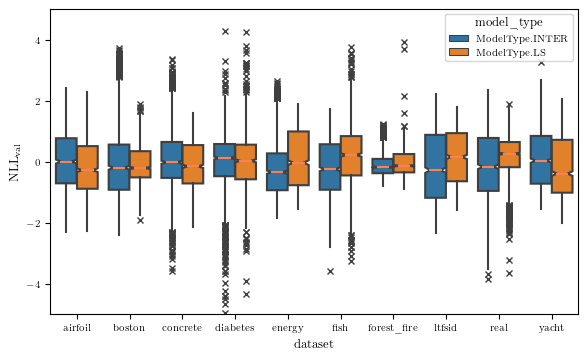

In [11]:
fig = plt.figure(figsize=set_size(textwidth))
sns.boxplot(
    df,
    x="dataset",
    y=NLL_val,
    hue="model_type",
    notch=True,
    showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "coral"},
    width=0.8,
)
plt.ylim(-5, 5)
plt.tight_layout()
fig.savefig("NLL_val_model_type.pdf")

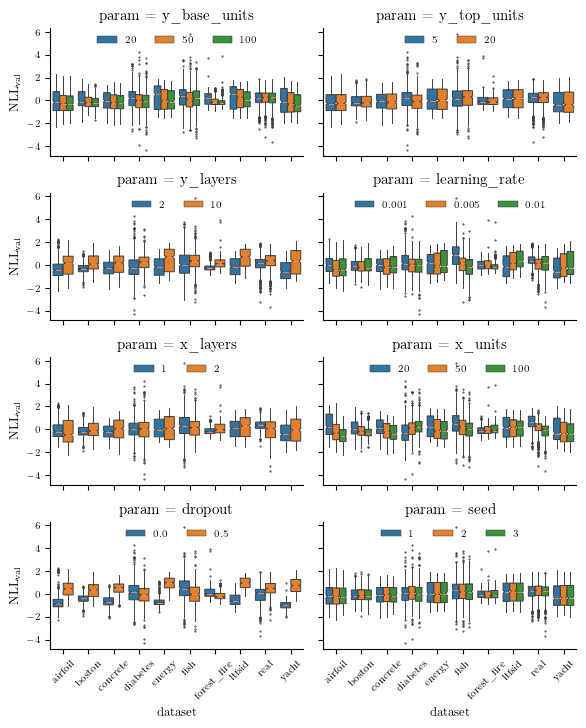

In [13]:
df_ls_ = df[df["model_type"] == "ModelType.LS"].copy(True)
# df_ls_ = df.copy(True)
df_ls_ = df_ls_[df_ls_["val_logLik"] < 100.0]
# df_ls_ = df_ls_[df_ls_['params.dropout'] == 0.]
subplots = (int(np.ceil(len(relevant_params) / 2.0)), 2)
fig, axes = plt.subplots(
    *subplots, figsize=set_size(textwidth, subplots=subplots), sharey=True
)
for i, (ax, param) in enumerate(zip(axes.flatten(), relevant_params + ['seed'])):
    sns.boxplot(
        df_ls_,
        hue=param,
        y=NLL_val,
        x="dataset",
        ax=ax,
        notch=True,
        showcaps=False,
        flierprops={"marker": "."},
        medianprops={"color": "coral"},
        # width=0.4,
        linewidth=0.7,
        fliersize=1,
    )
    sns.move_legend(
        ax,
        "lower center",
        ncol=df_ls_[param].nunique(),
        bbox_to_anchor=(0.5, 0.8),
        title=None,
        frameon=False,
    )
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    if i % 2 != 0:
        ax.set_ylabel("")
    labels = ax.get_xticklabels()
    if i // 2 != (subplots[0] - 1):
        ax.set_xlabel("")
        ax.set_xticklabels(labels=[])
    ax.set_title("param = " + param)
    # labels = ax.get_xticklabels()
    # ax.set_xticklabels(labels=labels, rotation=45)

axes[3, 1].set_xticklabels(labels=labels, rotation=45)
axes[3, 0].set_xticklabels(labels=labels, rotation=45)
#last_ax = axes[-1][1]
#last_ax.set_xticklabels(labels=[])
#last_ax.spines["right"].set_visible(False)
#last_ax.spines["top"].set_visible(False)
#last_ax.spines["left"].set_visible(False)
#last_ax.spines["bottom"].set_visible(False)
#last_ax.set_yticks([])
#last_ax.set_xticks([])
fig.tight_layout()
fig.savefig("NLL_val_params.pdf")

## Clustermap

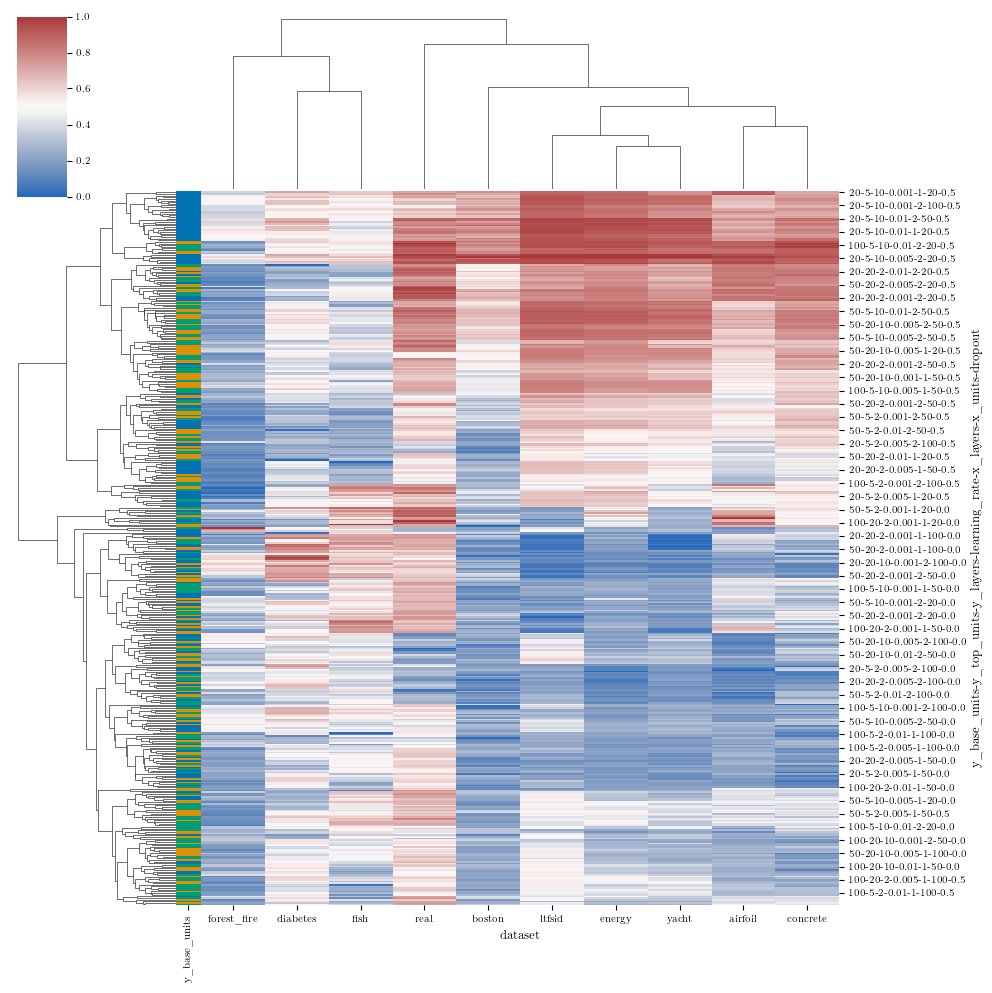

In [23]:
df_ls_ = df_ls.copy(True)
df_ls_ = df_ls_[df_ls_["val_logLik"] < 100.0]
df_ls_.drop(
    columns=["model_type", "experiment_id", "train_logLik"], inplace=True
)
df_ls_.rename(columns={"dataset": "dataset"}, inplace=True)
df_ls_ = df_ls_.pivot_table(
    index=relevant_params,
    columns="dataset",
    values="val_logLik",
    aggfunc=np.mean,
)
y_base_units = df_ls_.reset_index("y_base_units")[
    "y_base_units"
].to_numpy()
y_base_units = pd.Series(y_base_units, name="y_base_units")
y_base_units.index = df_ls_.index
color = [sns.color_palette()[2], sns.color_palette()[0], sns.color_palette()[3]]
lut = dict(zip(y_base_units.unique(), sns.color_palette("colorblind")))
row_color = y_base_units.map(lut)
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=row_color)

## color all parameters

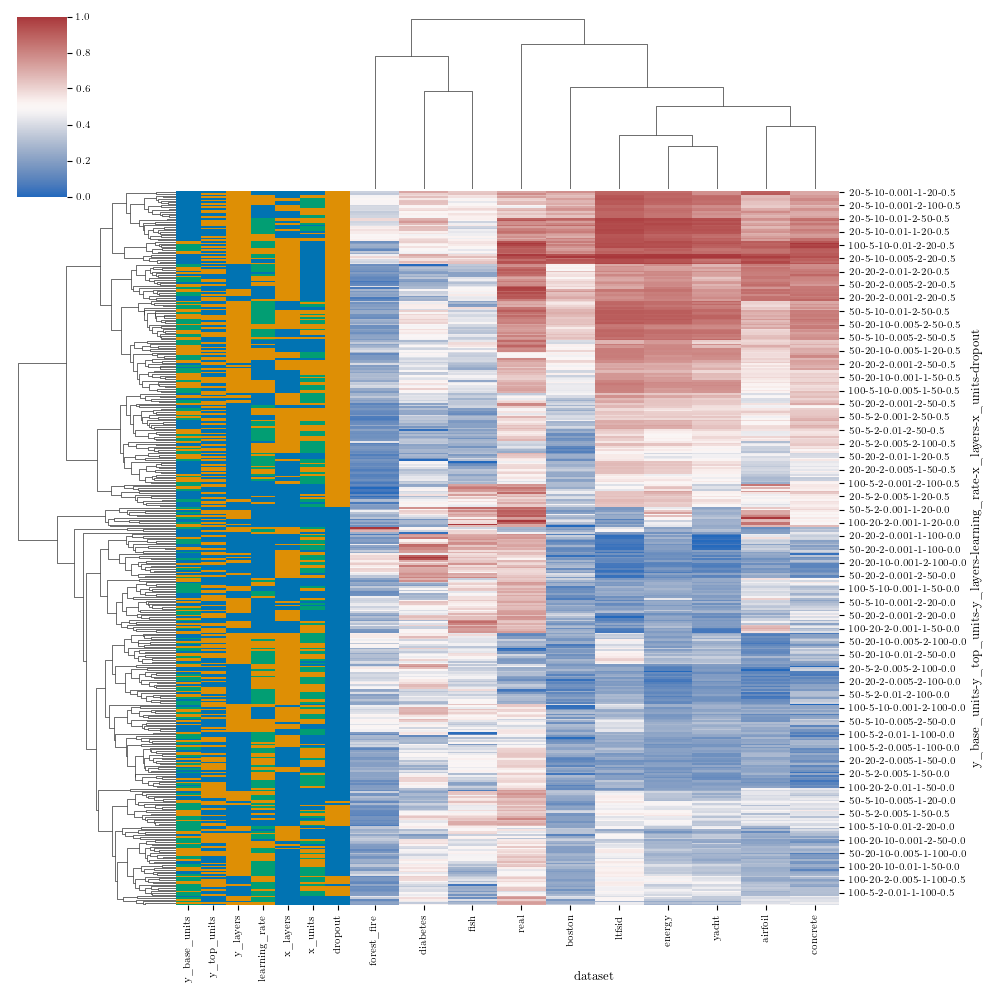

In [26]:
color_param = "y_top_units"
df_ls_ = df_ls.copy(True)
df_ls_ = df_ls_[df_ls_["val_logLik"] < 100.0]
df_ls_.drop(
    columns=["model_type", "experiment_id", "train_logLik"], inplace=True
)
df_ls_.rename(columns={"dataset": "dataset"}, inplace=True)
df_ls_ = df_ls_.pivot_table(
    index=relevant_params,
    columns="dataset",
    values="val_logLik",
    aggfunc=np.mean,
)


def get_color_map(color_param):
    param = df_ls_.reset_index(f"{color_param}")[
        f"{color_param}"
    ].to_numpy()
    param = pd.Series(param, name=color_param)
    param.index = df_ls_.index
    lut = dict(zip(param.unique(), sns.color_palette("colorblind")))
    return param.map(lut)


row_colors = [get_color_map(p) for p in relevant_params]
sns.clustermap(
    df_ls_, cmap="vlag", standard_scale=1, row_colors=pd.DataFrame(row_colors).T
)